In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'HousingData.csv'  
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.info())

print("\nFirst Few Rows:")
print(df.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None

First Few Rows of the Dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7

In [3]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

df.fillna(df.mean(), inplace=True)

print("\nMissing Values After Imputation:")
print(df.isnull().sum())

Missing Values in Each Column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Missing Values After Imputation:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


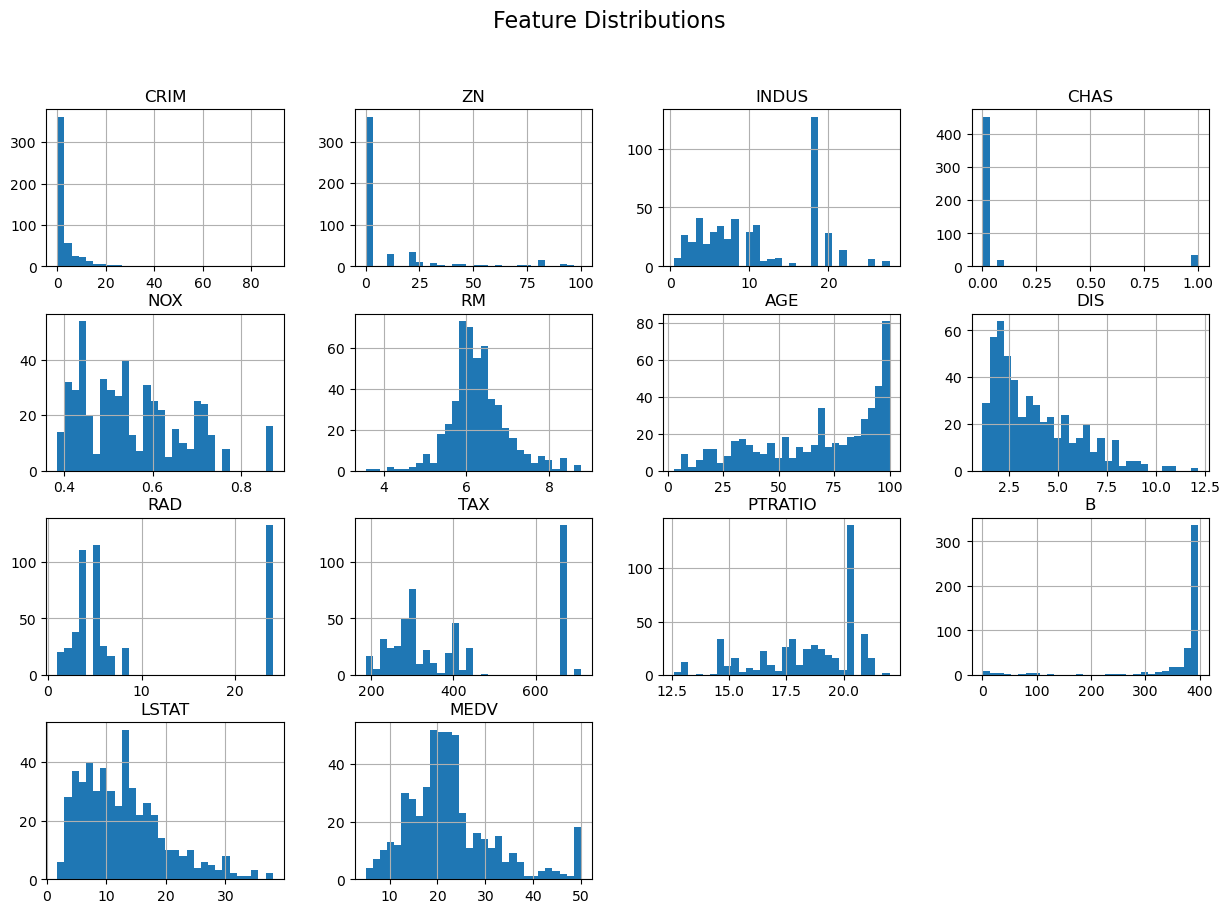

In [5]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

In [8]:
skewed_features = ['CRIM', 'ZN', 'INDUS', 'B', 'LSTAT']
df[skewed_features] = df[skewed_features].apply(lambda x: np.log1p(x))

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Scaled Dataset (first 5 rows):")
print(scaled_df.head())

Scaled Dataset (first 5 rows):
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.820922  1.212437 -1.703270 -0.279851 -0.144217  0.413672 -0.121059   
1 -0.800479 -0.619927 -0.333771 -0.279851 -0.740262  0.194274  0.378716   
2 -0.800498 -0.619927 -0.333771 -0.279851 -0.740262  1.282714 -0.270627   
3 -0.795613 -0.619927 -1.764840 -0.279851 -0.835284  1.016303 -0.828770   
4 -0.761039 -0.619927 -1.764840 -0.279851 -0.835284  1.228577 -0.522338   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.311086 -1.321598  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.311086 -0.321312 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.296977 -1.649303  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.303235 -2.111951  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.311086  0.250813  1.487503  


In [11]:
correlation_matrix = scaled_df.corr()
print("Correlation with MEDV:")
print(correlation_matrix["MEDV"].sort_values(ascending=False))

X = scaled_df.drop(columns=["MEDV"])
y = scaled_df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Correlation with MEDV:
MEDV       1.000000
RM         0.695360
ZN         0.386982
B          0.290198
DIS        0.249929
CHAS       0.179882
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
CRIM      -0.443338
TAX       -0.468536
PTRATIO   -0.507787
INDUS     -0.514553
LSTAT     -0.791332
Name: MEDV, dtype: float64

Training set size: (404, 13)
Testing set size: (102, 13)


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.23596938647464424
R-squared Score: 0.7283594270722139


In [14]:
residuals = y_test - y_pred

analysis_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Residual': residuals
})

top_residuals = analysis_df.abs().sort_values(by='Residual', ascending=False).head(5)
print("Top 5 Samples with Largest Residuals:")
print(top_residuals)

Top 5 Samples with Largest Residuals:
       Actual  Predicted  Residual
371  2.989460   0.125511  2.863949
412  0.504223   2.045715  1.541492
365  0.540617   0.723115  1.263732
0    0.159686   1.166077  1.006391
375  0.819852   0.129486  0.949337


In [15]:
top_indices = top_residuals.index
top_samples = scaled_df.loc[top_indices]

print("Features of Top 5 Samples with Largest Residuals:")
print(top_samples)

Features of Top 5 Samples with Largest Residuals:
         CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
371  1.475810 -0.619927  0.990134 -0.279851  0.659147 -0.097781  1.148442   
412  2.130084 -0.619927  0.990134 -0.279851  0.365444 -2.360139  1.148442   
365  0.871045 -0.619927  0.990134 -0.279851  1.410682 -3.880249  0.707035   
0   -0.820922  1.212437 -1.703270 -0.279851 -0.144217  0.413672 -0.121059   
375  2.169196  0.937358  0.990134 -0.279851  1.004680  1.465070  1.071834   

          DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
371 -1.248292  1.661245  1.530926  0.806576  0.200712 -0.249822  2.989460  
412 -1.065370  1.661245  1.530926  0.806576 -3.245956  2.045307 -0.504223  
365 -1.037181  1.661245  1.530926  0.806576  0.157233 -0.742132  0.540617  
0    0.140214 -0.982843 -0.666608 -1.459000  0.311086 -1.321598  0.159686  
375 -1.178318  1.661245  1.530926  0.806576  0.311086  0.348329 -0.819852  


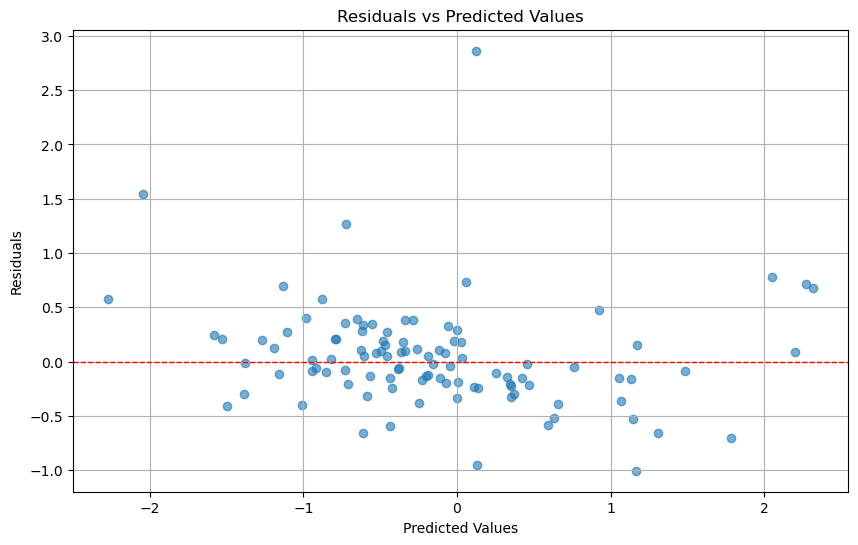

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

In [18]:
model_accuracy = r2 * 100
print(f"Model Accuracy (R-squared as percentage): {model_accuracy:.2f}%")


correlation_with_target = correlation_matrix["MEDV"].sort_values(ascending=False)
top_influential_factors = correlation_with_target[1:6]  

print("\nMost Influential Factors on Housing Prices (Correlation with MEDV):")
print(top_influential_factors)

Model Accuracy (R-squared as percentage): 72.84%

Most Influential Factors on Housing Prices (Correlation with MEDV):
RM      0.695360
ZN      0.386982
B       0.290198
DIS     0.249929
CHAS    0.179882
Name: MEDV, dtype: float64


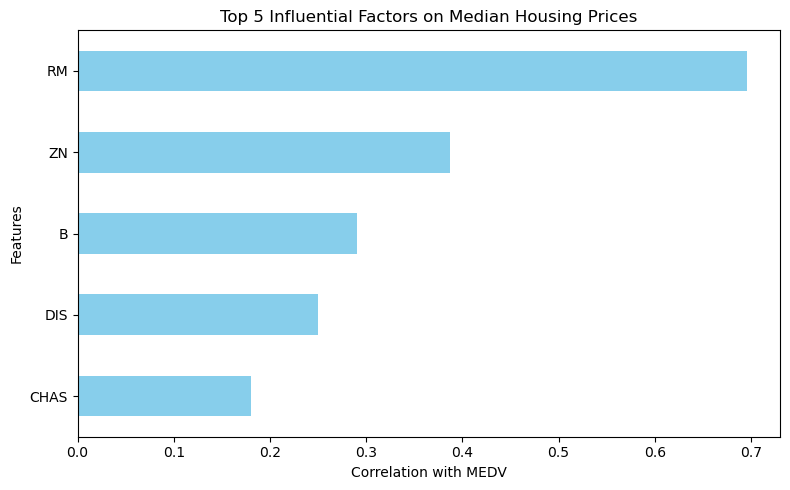

In [19]:
plt.figure(figsize=(8, 5))
top_influential_factors.sort_values().plot(kind="barh", color="skyblue")
plt.title("Top 5 Influential Factors on Median Housing Prices")
plt.xlabel("Correlation with MEDV")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

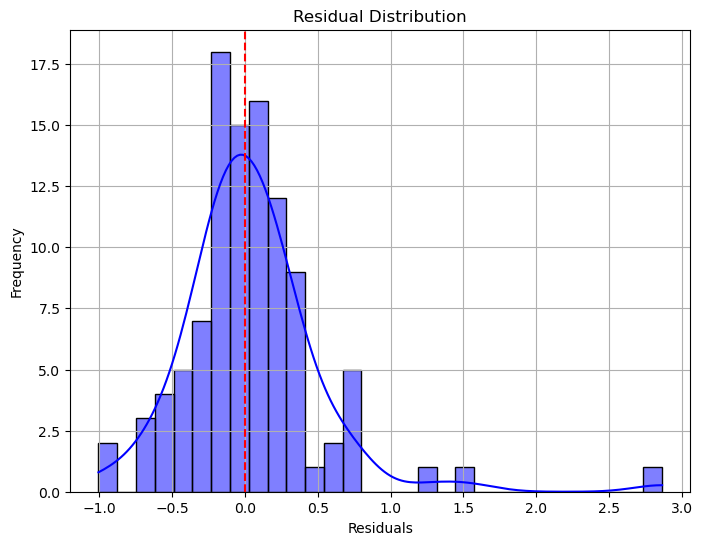

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

C:\Users\MHA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


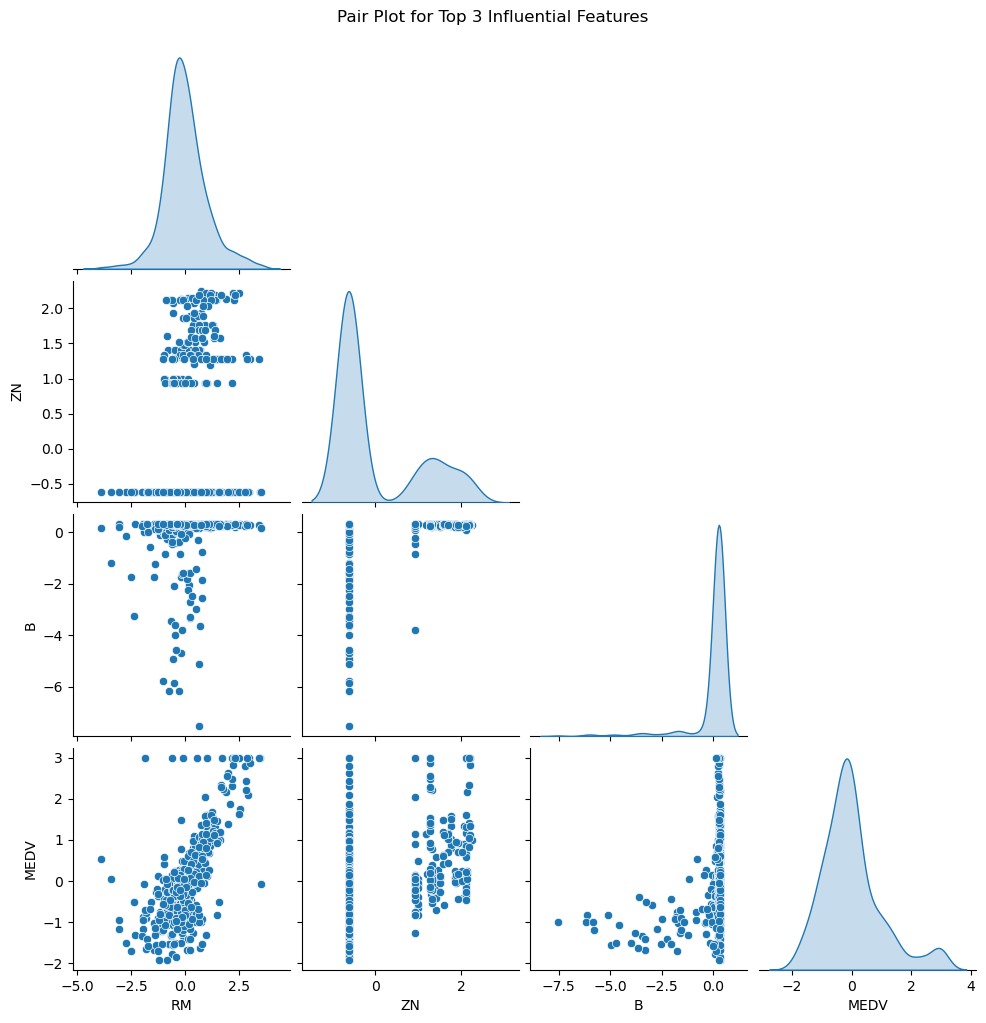

In [23]:
top_3_features = top_influential_factors.index[:3]
pairplot_data = scaled_df[top_3_features.tolist() + ["MEDV"]]

sns.pairplot(pairplot_data, diag_kind="kde", corner=True)
plt.suptitle("Pair Plot for Top 3 Influential Features", y=1.02)
plt.show()